<a href="https://colab.research.google.com/github/rliu7926/bcc-pdac-pd1-blockade/blob/master/24_MachineLearningClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial regression models exploration

Not used for final paper: not enough datapoints to perform regression on a per-patient level. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

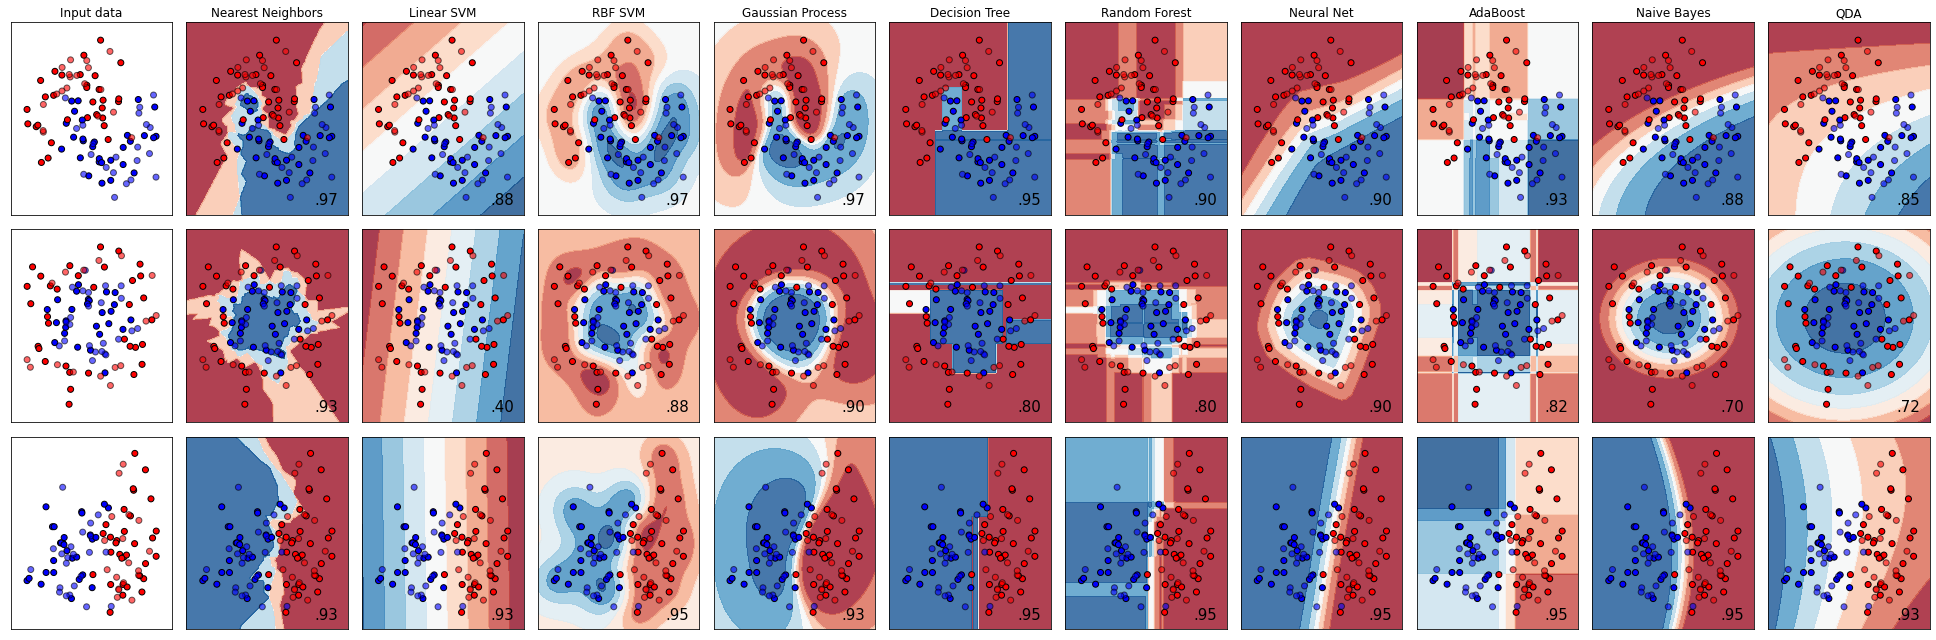

In [ ]:
## Script taken from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0, n_samples=100),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
## MHC scores data

import pandas as pd

# First 8 scores are from BCC patients (su001 - su008), last 16 scores are from PDAC patients (I1 - I16)
# PDAC patients are assumed to be nonresponsive for the purpose of having a test group to calculate "accuracy"

responses = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

macrophagescores = np.array([[71.2196, 398.271], [61.8623, 232.187], [88.4229, 672.91], [91.9336, 506.901], [65.7137, 119.262], [69.7543, 340.918], [76.4478, 708.632], [88.7544, 349.255], 
                             [138.3449, 45.72677], [66.37325, 65.0181], [43.76957, 347.6661], [44.27814, 248.7813], [50.26764, 140.2611], [68.90514, 287.2507], [43.89323, 381.5601], [71.71848, 338.9795], [79.05201, 13.97513], [65.72521, 190.8533], [70.85145, 191.8327], [75.55022, 182.2531], [113.4626, 48.15885], [64.74626, 128.8204], [53.41968, 332.0005], [89.42859, 266.0682]])
tcellscores = np.array([[29.66794, 0.8600966], [18.11596, 1.4814575], [29.12504, 0.7394178], [25.73249, 0.7190832], [22.74756, 0.7487351], [31.60223, 0.9658238], [25.29873, 1.4053252], [41.46510, 1.6060642],
                        [19.18359, 0.4088200], [16.41950, 0.8191403], [11.36646, 0.3718642], [12.79440, 0.4971784], [18.39173, 0.7980471], [18.74844, 0.6298558], [15.20740, 1.0704547], [16.56558, 0.6218634], [22.38871, 0.7512616], [12.69589, 0.6529139], [14.57993, 1.3789055], [15.02805, 0.4823259], [18.67643, 1.1086912], [15.43857, 0.4421736], [17.81540, 0.8624260], [17.23195, 0.7608327]])
allcellscores = np.array([[27.889211, 2.3662734], [14.787907, 5.0706784], [21.057958, 8.2302912], [24.541143, 2.8764973], [16.712201, 4.0320208], [16.190220, 1.3721860], [21.896451, 3.3102619], [26.541899, 3.8860149],
                          [18.989313, 2.0439521], [7.919430, 1.0327896], [7.636862, 2.1516666], [8.60629, 2.7997683], [8.732017, 3.0216685], [9.816920, 3.6615595], [9.009772, 8.3508632], [11.724699, 5.2852630], [31.160358, 1.3001688], [14.032516, 1.8816081], [6.759133, 3.9225717], [9.394719, 1.7635259], [15.093304, 3.4490845], [9.973428, 2.9435532], [11.585392, 7.2878238], [6.560512, 0.9350595]])


macrophagedata = (macrophagescores, responses)
tcelldata = (tcellscores, responses)
allcelldata = (allcellscores, responses)

datasets = [macrophagedata, tcelldata, allcelldata]

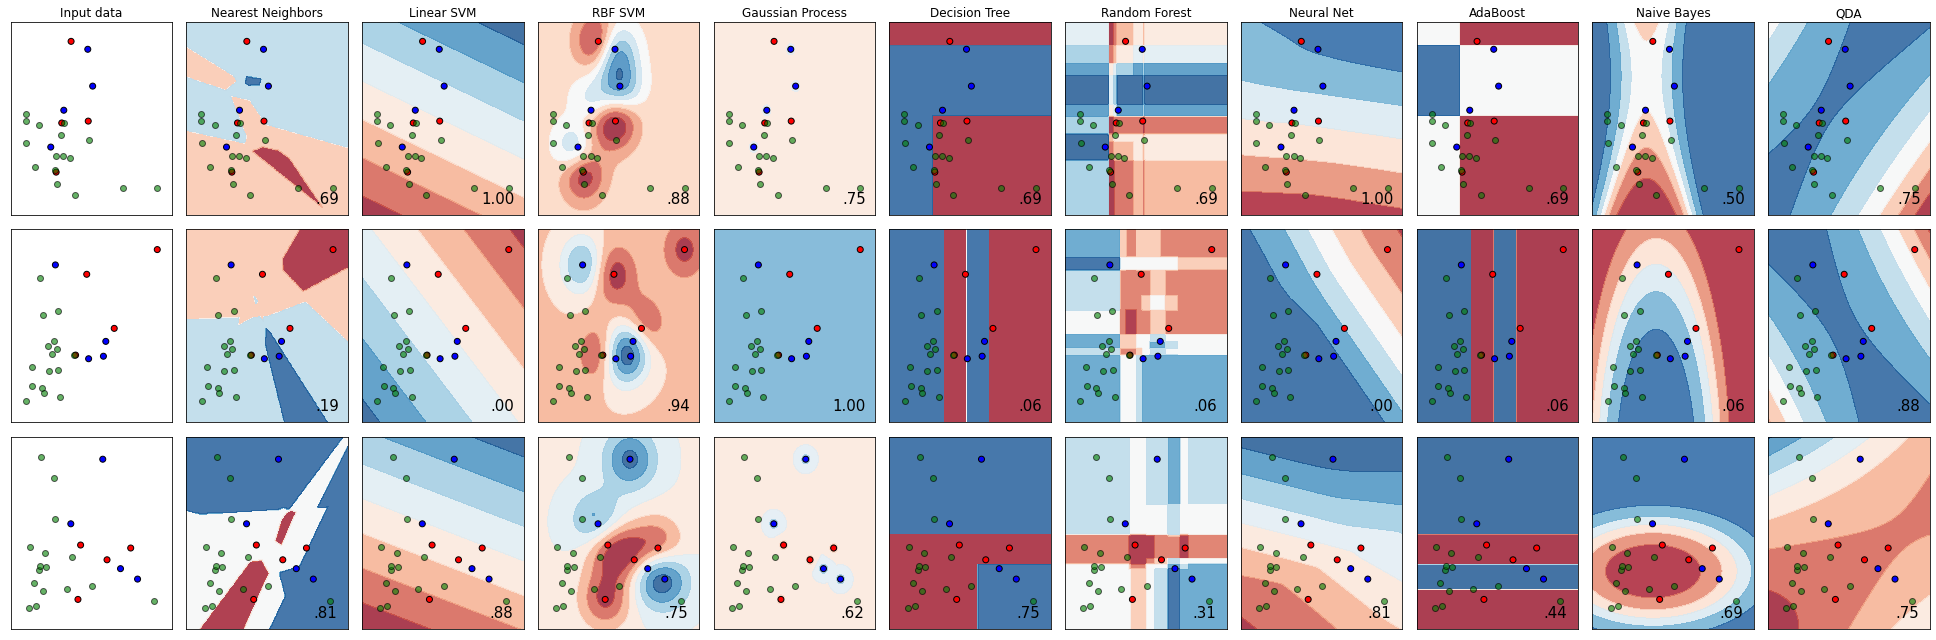

In [ ]:
## Run script using MHC scores data

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=16, shuffle=False) ## Set test set to be PDAC patients

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

## Upload csv files from R
uploaded = files.upload()

Saving AllCellsMHCScores.csv to AllCellsMHCScores (14).csv
Saving AllCellsResponseStatus.csv to AllCellsResponseStatus (14).csv
Saving MacrophageMHCScores.csv to MacrophageMHCScores (13).csv
Saving MacrophageResponseStatus.csv to MacrophageResponseStatus (13).csv
Saving TCellMHCScores.csv to TCellMHCScores (13).csv
Saving TCellResponseStatus.csv to TCellResponseStatus (13).csv


In [ ]:
## Turn uploaded csv files into pandas dataframes

import io
import pandas as pd

AllCellsMHCScores = pd.read_csv(io.BytesIO(uploaded['AllCellsMHCScores.csv'])) # 2233 responders, 12384 nonresponders, 46562 PDAC
MacrophageMHCScores = pd.read_csv(io.BytesIO(uploaded['MacrophageMHCScores.csv'])) # 119 responders, 1054 nonresponders, 6926 PDAC
TCellMHCScores = pd.read_csv(io.BytesIO(uploaded['TCellMHCScores.csv'])) # 1774 responders, 5065 nonresponders, 10010 PDAC

## Equate sizes of responders and nonresponders

AllCellsMHCScores_BCC_Responder = AllCellsMHCScores.iloc[0:2233]
AllCellsMHCScores_BCC_Nonresponder = AllCellsMHCScores.iloc[2233:14617]
AllCellsMHCScores_PDAC = AllCellsMHCScores.iloc[14617:61179]
AllCellsMHCScores_BCC_Responder = AllCellsMHCScores_BCC_Responder.sample(n=1000)
AllCellsMHCScores_BCC_Nonresponder = AllCellsMHCScores_BCC_Nonresponder.sample(n=1000)
AllCellsMHCScores_PDAC = AllCellsMHCScores_PDAC.sample(n=2000)


AllCellsMHCScores_filter = [AllCellsMHCScores_BCC_Responder, AllCellsMHCScores_BCC_Nonresponder, AllCellsMHCScores_PDAC]
AllCellsMHCScores_filter = pd.concat(AllCellsMHCScores_filter)


MacrophageMHCScores_BCC_Responder = MacrophageMHCScores[0:119]
MacrophageMHCScores_BCC_Nonresponder = MacrophageMHCScores[119:1173]
MacrophageMHCScores_BCC_Nonresponder = MacrophageMHCScores_BCC_Nonresponder.sample(n=119)
MacrophageMHCScores_PDAC = MacrophageMHCScores[1173:8099]

MacrophageMHCScores_filter = [MacrophageMHCScores_BCC_Responder, MacrophageMHCScores_BCC_Nonresponder, MacrophageMHCScores_PDAC]
MacrophageMHCScores_filter = pd.concat(MacrophageMHCScores_filter)


TCellMHCScores_BCC_Responder = TCellMHCScores[0:1774]
TCellMHCScores_BCC_Nonresponder = TCellMHCScores[1774:6839]
TCellMHCScores_PDAC = TCellMHCScores[6839:16849]
TCellMHCScores_BCC_Responder = TCellMHCScores_BCC_Responder.sample(n=1000)
TCellMHCScores_BCC_Nonresponder = TCellMHCScores_BCC_Nonresponder.sample(n=1000)
TCellMHCScores_PDAC = TCellMHCScores_PDAC.sample(n=2000)

TCellMHCScores_filter = [TCellMHCScores_BCC_Responder, TCellMHCScores_BCC_Nonresponder, TCellMHCScores_PDAC]
TCellMHCScores_filter = pd.concat(TCellMHCScores_filter)

## Dataframes for response status

MacrophageResponseStatus = np.array([0]*119+[1]*(119+6926))
TCellResponseStatus = np.array([0]*1000+[1]*(1000+2000))
AllCellsResponseStatus = np.array([0]*1000+[1]*(1000+2000))

## Turn filtered pandas dataframes into numpy arrays

macrophagedata = (np.array(MacrophageMHCScores_filter), MacrophageResponseStatus)
tcelldata = (np.array(TCellMHCScores_filter), TCellResponseStatus)
allcelldata = (np.array(AllCellsMHCScores_filter), AllCellsResponseStatus)

datasets = [macrophagedata]


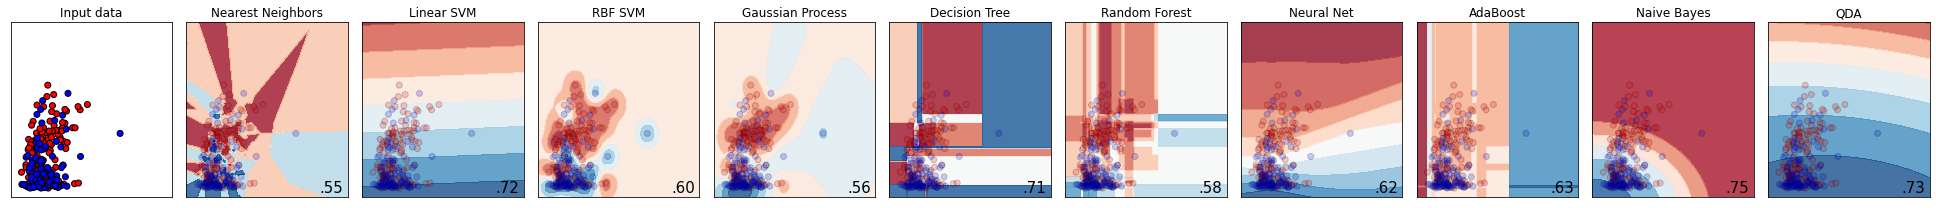

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


figure = plt.figure(figsize=(27, 3))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=119*2, shuffle=False) ## Set training set to be BCC patients

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    # ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.2)
        # Plot the testing points
        # ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Nearest Neighbors
Linear SVM
RBF SVM
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


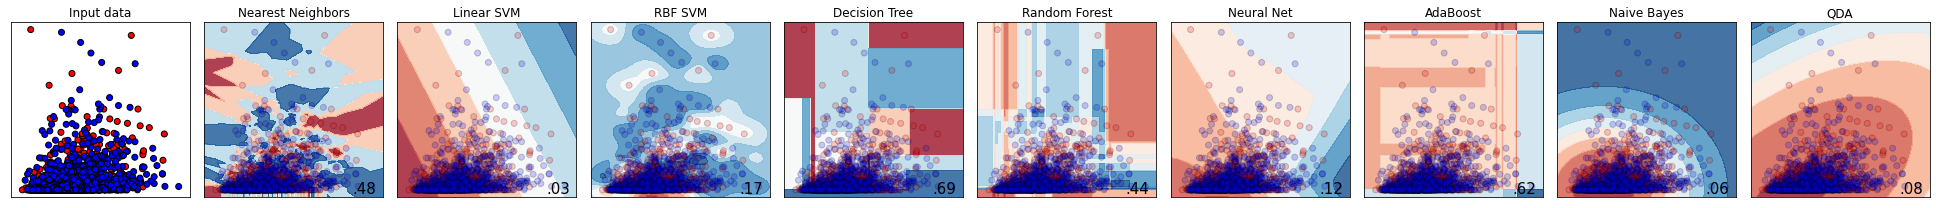

In [ ]:
datasets = [tcelldata]

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


figure = plt.figure(figsize=(27, 3))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=2000, shuffle=False) ## Set training set to be BCC patients

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    # ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.2)
        # Plot the testing points
        # ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        print(name)

plt.tight_layout()
plt.show()

Nearest Neighbors
Linear SVM
RBF SVM
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


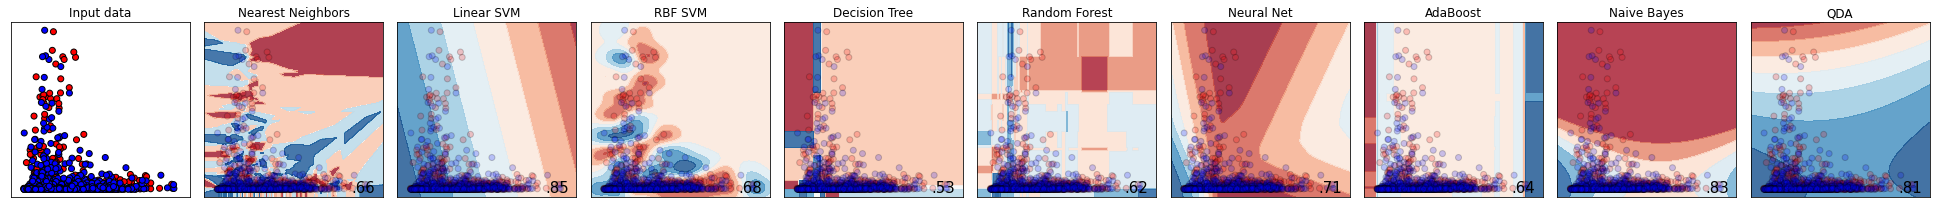

In [ ]:
datasets = [allcelldata]

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


figure = plt.figure(figsize=(27, 3))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=2000, shuffle=False) ## Set training set to be BCC patients

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    # ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.2)
        # Plot the testing points
        # ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        print(name)

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
import pandas as pd
import io

## Upload csv files from R
uploaded = files.upload()

Saving MacropahgeDEGResponses.csv to MacropahgeDEGResponses.csv
Saving MacrophageDEGScores.csv to MacrophageDEGScores.csv


In [ ]:
## Turn uploaded csv files into pandas dataframes

MacrophageDEGScores = pd.read_csv(io.BytesIO(uploaded['MacrophageDEGScores.csv'])) # 4 responders (su001 - su004), 4 nonresponders (s005 - su008), 16 PDAC (I1 - I16)

## Turn dataframes into numpy arrays

MacrophageDEGScores = np.array(MacrophageDEGScores)
MacrophageDEGResponses = np.array([1]*4+[0]*20)
MacrophageDEGData = (MacrophageDEGScores, MacrophageDEGResponses)
datasets = [MacrophageDEGData]


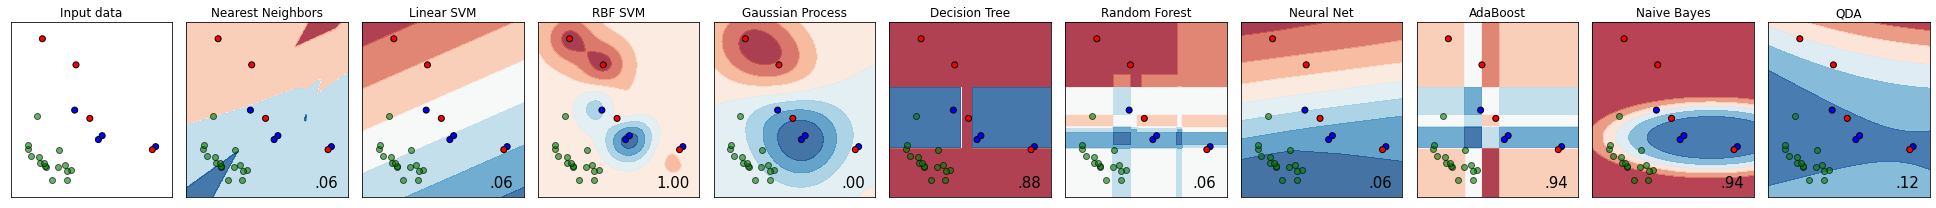

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


figure = plt.figure(figsize=(27, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=16, shuffle=False) ## Set test set to be PDAC patients

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c='green', cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Construct a classifier to determine response status in BCC CD8+ T cells based on DEGs between responders and nonresponders

Not used for final paper: high likelihood of confirmation bias by only focusing on the genes that we already know are differentially expressed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from google.colab import files
import pandas as pd
import io

## Upload csv files from R
uploaded = files.upload()

Saving CD8DEGResponsesBCC.csv to CD8DEGResponsesBCC.csv
Saving CD8DEGResponsesBCCPost.csv to CD8DEGResponsesBCCPost.csv
Saving CD8DEGResponsesPDAC.csv to CD8DEGResponsesPDAC.csv
Saving CD8DEGScoresBCC.csv to CD8DEGScoresBCC.csv
Saving CD8DEGScoresBCCPost.csv to CD8DEGScoresBCCPost.csv
Saving CD8DEGScoresPDAC.csv to CD8DEGScoresPDAC.csv


In [ ]:
## Turn uploaded csv files into pandas dataframes

CD8DEGScoresBCC = pd.read_csv(io.BytesIO(uploaded['CD8DEGScoresBCC.csv']))
CD8DEGScoresPDAC = pd.read_csv(io.BytesIO(uploaded['CD8DEGScoresPDAC.csv']))

CD8DEGResponsesBCC = np.array([1]*468+[0]*1509+[1]*3330+[0]*62+[1]*513) # 5882 total cells, 1571 nonresponders, 4311 responders
CD8DEGResponsesPDAC = np.array([0]*4679)

## Turn dataframes into numpy arrays

CD8DEGScoresBCC = np.array(CD8DEGScoresBCC)
CD8DEGDataBCC = (CD8DEGScoresBCC, CD8DEGResponsesBCC)
dataset = [CD8DEGDataBCC]


In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=1176, shuffle=True) ## Test set is 20% of total (0.2*5882=1176)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(score, names[i])
        i += 1

## Code run 10 times to ensure consistency in classifier scores
## Best performer: neural net (~89%)

0.8528911564625851 Nearest Neighbors
0.8367346938775511 Linear SVM
0.7270408163265306 RBF SVM
0.8647959183673469 Decision Tree
0.810374149659864 Random Forest
0.8852040816326531 Neural Net
0.8562925170068028 AdaBoost
0.8188775510204082 Naive Bayes
0.8248299319727891 QDA


In [ ]:
## Parameters that can be changed in neural nets (MLPClassifier):
## Alpha (alpha): impacts magnitude of correction on loss function (default=0.0001)
## Iterations (max_iter): (default=200)
## Hidden layer number + size (hidden_layer_sizes): (default=(100,))


for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True) 

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(100, 100, 100), verbose=False)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

## Balanced accuracy doesn't rise significantly above 80/92% given any combination of hidden layer sizes

[[285  52]
 [ 88 752]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       337
           1       0.94      0.90      0.91       840

    accuracy                           0.88      1177
   macro avg       0.85      0.87      0.86      1177
weighted avg       0.89      0.88      0.88      1177



In [ ]:
## Cross validation with 5 folds and 80/20 split

from sklearn.model_selection import cross_val_score

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(100, 100, 100), verbose=False)

shuffler = np.random.permutation(len(CD8DEGScoresBCC))
X = CD8DEGScoresBCC[shuffler]
y = CD8DEGResponsesBCC[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1') 
print(scores)
print("Mean: {}, SD: {}".format(scores.mean(), scores.std()))

[0.91931902 0.92285298 0.92496392 0.93023256 0.91884263]
Mean: 0.9232422230604849, SD: 0.004164817136939166


In [ ]:
## Construct ROC and PR curves for neural net

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(100, 100, 100), verbose=False)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

classifier2 = LogisticRegression()
classifier2.fit(X_train[:, 0:12], y_train)
predictions2 = classifier2.predict(X_test[:, 0:12])


fpr, tpr, threshold = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test, classifier2.predict_proba(X_test[:, 0:12])[:,1])

roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)

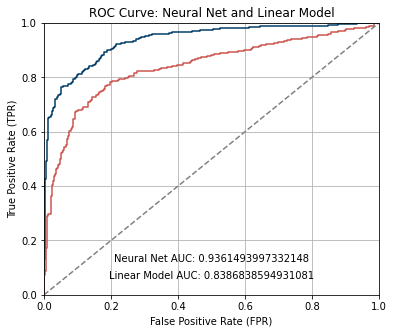

In [ ]:
plt.figure(figsize=(6, 5))
plt.title('ROC Curve: Neural Net and Linear Model')
plt.plot(fpr, tpr, color='#003C67FF')
plt.plot(fpr2, tpr2, color='#CD534CFF')
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.text(.5, .12, "Neural Net AUC: {}".format(roc_auc), ha='center')
plt.text(.5, .06, "Linear Model AUC: {}".format(roc_auc2), ha='center')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

pre, rec, threshold = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,1])
pre2, rec2, threshold2 = precision_recall_curve(y_test, classifier2.predict_proba(X_test[:, 0:12])[:,1])

baseline = len(y_test[y_test==1]) / len(y_test)



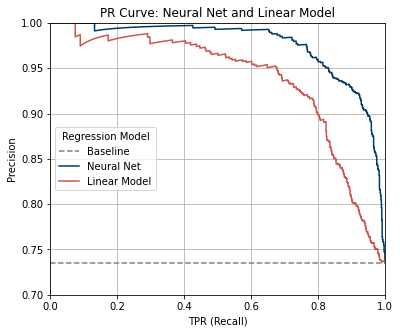

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline', color='grey')
plt.plot(rec, pre, label ='Neural Net', color='#003C67FF')
plt.plot(rec2, pre2, label = 'Linear Model', color='#CD534CFF')
plt.xlim([0,1])
plt.ylim([0.7,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('PR Curve: Neural Net and Linear Model')
plt.legend(title='Regression Model')
plt.grid()
plt.show()


In [ ]:
## Test neural net on entire set of BCC and PDAC patients data 

BCCpredictions = classifier.predict(CD8DEGScoresBCC)
PDACpredictions = classifier.predict(CD8DEGScoresPDAC)

print(confusion_matrix(CD8DEGResponsesBCC, BCCpredictions))
print(classification_report(CD8DEGResponsesBCC, BCCpredictions))

print(confusion_matrix(CD8DEGResponsesPDAC, PDACpredictions))
print(classification_report(CD8DEGResponsesPDAC, PDACpredictions))

## Export predictions to a csv for per-patient analysis in R

from google.colab import files

df1 = pd.DataFrame(BCCpredictions)
df2 = pd.DataFrame(PDACpredictions)

with open('BCCpredictionsMLP.csv', 'w') as f:
  f.write(df1.to_csv())

with open('PDACpredictionsMLP.csv', 'w') as f: 
  f.write(df2.to_csv())

files.download('BCCpredictionsMLP.csv')
files.download('PDACpredictionsMLP.csv')


[[1506   65]
 [ 148 4163]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1571
           1       0.98      0.97      0.98      4311

    accuracy                           0.96      5882
   macro avg       0.95      0.96      0.95      5882
weighted avg       0.96      0.96      0.96      5882

[[2153 2526]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63      4679
           1       0.00      0.00      0.00         0

    accuracy                           0.46      4679
   macro avg       0.50      0.23      0.32      4679
weighted avg       1.00      0.46      0.63      4679



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Test neural net on BCC post-treatment

CD8DEGScoresBCCpost = pd.read_csv(io.BytesIO(uploaded['CD8DEGScoresBCCPost.csv']))
CD8DEGResponsesBCCpost = np.array([1]*2589+[0]*3892+[1]*3951+[0]*266+[1]*128)

BCCpostpredictions = classifier.predict(CD8DEGScoresBCCpost)

print(confusion_matrix(CD8DEGResponsesBCCpost, BCCpostpredictions))
print(classification_report(CD8DEGResponsesBCCpost, BCCpostpredictions))

df1 = pd.DataFrame(BCCpostpredictions)

with open('BCCpostpredictionsMLP.csv', 'w') as f:
  f.write(df1.to_csv())

files.download('BCCpostpredictionsMLP.csv')


[[2675 1483]
 [2146 4522]]
              precision    recall  f1-score   support

           0       0.55      0.64      0.60      4158
           1       0.75      0.68      0.71      6668

    accuracy                           0.66     10826
   macro avg       0.65      0.66      0.65     10826
weighted avg       0.68      0.66      0.67     10826



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Export melanoma dataset into Seurat

Unnecessary to run again -- melanoma dataset can be imported directly from Seurat


In [ ]:
! pip install scanpy

import pandas as pd
import scanpy as sc
import anndata as ad
from scipy import io
import scipy.io as sio
from scipy.sparse import csr_matrix

def WriteToCSV(adata,FolderPath):
    '''Takes an adata and a (pre-existing) folderpath and writes the adata.X as a .mtx and the obs and vars to seperate csvs.'''
    print('Writing Matrix')
    mat = adata.X.transpose()
    sio.mmwrite(FolderPath+'mat.mtx', mat)
    print('Writing obs and vars')
    adata.obs.to_csv(FolderPath + 'obs.csv')
    adata.var.to_csv(FolderPath + 'var_names.csv') 


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tcellstates.h5ad to tcellstates (1).h5ad


In [ ]:
melanoma_dataset = sc.read_h5ad(filename='tcellstates (1).h5ad')
WriteToCSV(melanoma_dataset, '')
files.download('obs.csv')
files.download('var_names.csv')
files.download('mat.mtx')

Writing Matrix
Writing obs and vars


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediction of BCC CD8+ T cell response based on the top *n* highly variable genes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Construct regression classifiers using top 2000 higly variable genes in BCC

from google.colab import files
import pandas as pd
import io

## Upload csv files from R
uploaded = files.upload()

# Upload CD8VarGenesDataBCC, CD8VarGenesDataPDAC, CD8VarGenesResponsesBCC, CD8VarGenesResponsesPDAC

Saving CD8VarGenesDataBCC.csv to CD8VarGenesDataBCC.csv
Saving CD8VarGenesDataPDAC.csv to CD8VarGenesDataPDAC.csv
Saving CD8VarGenesResponsesBCC.csv to CD8VarGenesResponsesBCC.csv
Saving CD8VarGenesResponsesPDAC.csv to CD8VarGenesResponsesPDAC.csv


In [ ]:
CD8GenesBCC = pd.read_csv(io.BytesIO(uploaded['CD8VarGenesDataBCC.csv']))
CD8GenesPDAC = pd.read_csv(io.BytesIO(uploaded['CD8VarGenesDataPDAC.csv']))

CD8ResponsesBCC = np.array([1]*468+[0]*1509+[1]*3330+[0]*62+[1]*513) # 5882 total cells, 1571 nonresponders, 4311 responders
CD8ResponsesPDAC = np.array([0]*4679)

## Turn dataframes into numpy arrays

CD8GenesBCC = np.array(CD8GenesBCC)
CD8DataBCC = (CD8GenesBCC, CD8ResponsesBCC)
dataset = [CD8DataBCC]

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=1176, shuffle=True) ## Test set is 20% of total (0.2*5882=1176)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(score, names[i])
        i += 1

## Best performer: neural net (~93%)

0.7746598639455783 Nearest Neighbors
0.8979591836734694 Linear SVM
0.7304421768707483 RBF SVM
0.8758503401360545 Decision Tree
0.7304421768707483 Random Forest
0.91921768707483 Neural Net
0.8818027210884354 AdaBoost
0.4583333333333333 Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.7380952380952381 QDA


In [ ]:
## Parameters that can be changed in neural nets (MLPClassifier):
## Alpha (alpha): impacts magnitude of correction on loss function (default=0.0001)
## Iterations (max_iter): (default=200)
## Hidden layer number + size (hidden_layer_sizes): (default=(100,))


for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True) 

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

## Very small neural nets seem to work best -- 94% accuracy

[[275  51]
 [ 41 810]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       326
           1       0.94      0.95      0.95       851

    accuracy                           0.92      1177
   macro avg       0.91      0.90      0.90      1177
weighted avg       0.92      0.92      0.92      1177



In [ ]:
## Cross validation with 5 folds and 80/20 split

from sklearn.model_selection import cross_val_score

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)

shuffler = np.random.permutation(len(CD8ResponsesBCC))
X = CD8GenesBCC[shuffler]
y = CD8ResponsesBCC[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1') 
print(scores)
print("Mean: {}, SD: {}".format(scores.mean(), scores.std()))

[0.97684515 0.96209913 0.96930764 0.96184305 0.96561814]
Mean: 0.9671426218384758, SD: 0.0055618830143061


In [ ]:
## Construct ROC and PR curves for neural net

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

classifier2 = LogisticRegression(max_iter=5000)
classifier2.fit(X_train[:, 0:2000], y_train)
predictions2 = classifier2.predict(X_test[:, 0:2000])


fpr, tpr, threshold = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test, classifier2.predict_proba(X_test[:, 0:2000])[:,1])

roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


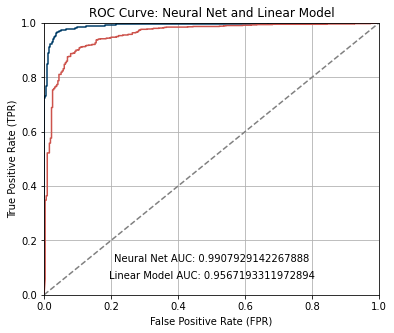

In [ ]:
plt.figure(figsize=(6, 5))
plt.title('ROC Curve: Neural Net and Linear Model')
plt.plot(fpr, tpr, color='#003C67FF')
plt.plot(fpr2, tpr2, color='#CD534CFF')
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.text(.5, .12, "Neural Net AUC: {}".format(roc_auc), ha='center')
plt.text(.5, .06, "Linear Model AUC: {}".format(roc_auc2), ha='center')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

pre, rec, threshold = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,1])
pre2, rec2, threshold2 = precision_recall_curve(y_test, classifier2.predict_proba(X_test[:, 0:2000])[:,1])

baseline = len(y_test[y_test==1]) / len(y_test)


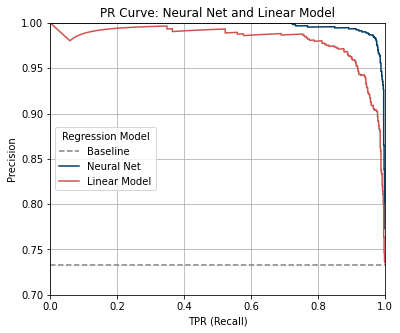

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline', color='grey')
plt.plot(rec, pre, label ='Neural Net', color='#003C67FF')
plt.plot(rec2, pre2, label = 'Linear Model', color='#CD534CFF')
plt.xlim([0,1])
plt.ylim([0.7,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('PR Curve: Neural Net and Linear Model')
plt.legend(title='Regression Model')
plt.grid()
plt.show()


In [ ]:
## Compare neural nets for top n genes

topgenes = [2000, 1000, 500, 200, 100, 50, 20, 10, 5]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


i = 0
# Iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True) ## Test set is 20% of total (0.2*5882=1176)

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)

# Iterate over gene subsets 
for i in range(len(topgenes)):
  classifier.fit(X_train[:, 0:topgenes[i]], y_train)
  score = classifier.score(X_test[:, 0:topgenes[i]], y_test)
  print(score, "Number of genes: ", topgenes[i])


0.9260832625318607 Number of genes:  2000
0.9345794392523364 Number of genes:  1000
0.9124893797790994 Number of genes:  500
0.8887000849617672 Number of genes:  200
0.8776550552251486 Number of genes:  100
0.8589634664401019 Number of genes:  50
0.7850467289719626 Number of genes:  20
0.7714528462192014 Number of genes:  10
0.7638062871707731 Number of genes:  5


In [ ]:
## Construct ROC and PR curves for neural net

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)
fpr, tpr, roc_auc, pre, rec = ([0] * len(topgenes) for i in range(5))

for i in range(len(topgenes)):
  classifier.fit(X_train[:, 0:topgenes[i]], y_train)
  predictions = classifier.predict(X_test[:, 0:topgenes[i]])
  fpr[i], tpr[i], threshold = roc_curve(y_test, classifier.predict_proba(X_test[:, 0:topgenes[i]])[:,1])
  pre[i], rec[i], threshold = precision_recall_curve(y_test, classifier.predict_proba(X_test[:, 0:topgenes[i]])[:,1])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print("AUC:", roc_auc[i], "Genes:", topgenes[i])

AUC: 0.9699873877547939 Genes: 2000
AUC: 0.9749794201388102 Genes: 1000
AUC: 0.9528362447228704 Genes: 500
AUC: 0.9448988377098579 Genes: 200
AUC: 0.9368783560278224 Genes: 100
AUC: 0.916279614231446 Genes: 50
AUC: 0.8114979118049104 Genes: 20
AUC: 0.7717636752233575 Genes: 10
AUC: 0.718342886920271 Genes: 5


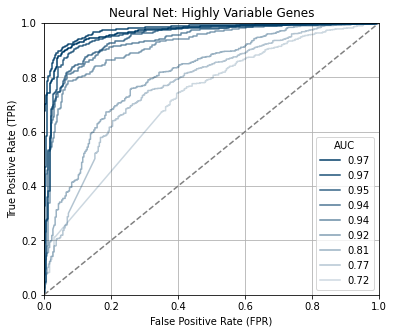

In [ ]:

fig, ax = plt.subplots(figsize=(6, 5))
plt.title('Neural Net: Highly Variable Genes')
for i in range(len(topgenes)): 
  plt.plot(fpr[i], tpr[i], color='#003C67FF', alpha=1-0.1*i)
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(labels=np.round(roc_auc, decimals=2), title="AUC", loc=4)
plt.grid()
plt.show()

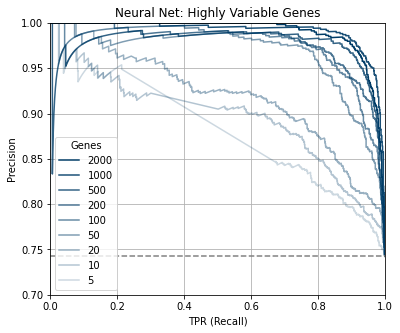

In [ ]:
baseline = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(6, 5))
for i in range(len(topgenes)):
  plt.plot(rec[i], pre[i], color='#003C67FF', alpha=1-0.1*i)
plt.xlim([0,1])
plt.ylim([0.7,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('Neural Net: Highly Variable Genes')
plt.legend(labels=topgenes, title="Genes")
plt.plot([0, 1], [baseline, baseline], linestyle='--', color='grey')
plt.grid()
plt.show()

In [ ]:
## Test model on entire set of BCC and PDAC data

from sklearn.metrics import classification_report, confusion_matrix

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)
classifier.fit(X_train, y_train)

CD8GenesBCCScaled = StandardScaler().fit_transform(CD8GenesBCC)
CD8GenesPDACScaled = StandardScaler().fit_transform(CD8GenesPDAC)

BCCpredictions = classifier.predict(CD8GenesBCCScaled)
PDACpredictions = classifier.predict(CD8GenesPDACScaled)

print(confusion_matrix(CD8ResponsesBCC, BCCpredictions))
print(classification_report(CD8ResponsesBCC, BCCpredictions))

print(confusion_matrix(CD8ResponsesPDAC, PDACpredictions))
print(classification_report(CD8ResponsesPDAC, PDACpredictions))

# Results extremely good for BCC, predicts 82% of PDAC cells will respond

[[1517   54]
 [  46 4265]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1571
           1       0.99      0.99      0.99      4311

    accuracy                           0.98      5882
   macro avg       0.98      0.98      0.98      5882
weighted avg       0.98      0.98      0.98      5882

[[ 788 3891]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      4679
           1       0.00      0.00      0.00         0

    accuracy                           0.17      4679
   macro avg       0.50      0.08      0.14      4679
weighted avg       1.00      0.17      0.29      4679



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Export predictions to a csv for per-patient analysis in R

from google.colab import files

df1 = pd.DataFrame(BCCpredictions)
df2 = pd.DataFrame(PDACpredictions)

with open('BCCpredictionsMLP2000.csv', 'w') as f:
  f.write(df1.to_csv())

with open('PDACpredictionsMLP2000.csv', 'w') as f: 
  f.write(df2.to_csv())

files.download('BCCpredictionsMLP2000.csv')
files.download('PDACpredictionsMLP2000.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Investigate whether BCC neural net accurately predicts melanoma response

In [ ]:
## Load melanoma T cell dataset

!pip install scanpy
import scanpy as sc

from google.colab import files
import pandas as pd
import io

## Upload csv files
uploaded = files.upload()

# MelanomaData.csv
# CD8MelanomaGenesDataBCC.csv
# CD8MelanomaGenesDataPDAC.csv
# MelanomaGenes.csv
# tcellstates.h5ad

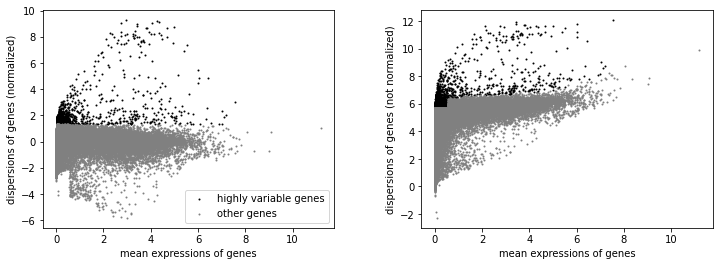

In [ ]:
# Create "Seurat" object from h5ad file 
melanoma_dataset = sc.read_h5ad(filename='tcellstates.h5ad')

# Identify top 2000 highly variable genes 
sc.pp.highly_variable_genes(melanoma_dataset, n_top_genes=2000, flavor='seurat')
sc.pl.highly_variable_genes(melanoma_dataset)

In [ ]:
uploaded = files.upload()

Saving CD8VarGenesNames.csv to CD8VarGenesNames.csv


In [ ]:
## Filter out gene data for highly expressed BCC genes 

import numpy as np

# Determine subset of highly expressed BCC genest 
VarGenes = pd.read_csv(io.BytesIO(uploaded['CD8VarGenesNames.csv']))
Genelist = tuple(VarGenes.T.itertuples(index=False, name=None))
melanoma_genes = tuple(melanoma_dataset.var.index.values)

gene_comparison = {Genelist[0], melanoma_genes}
gene_comparison = (set(tup) for tup in gene_comparison)
common_genes = set.intersection(*gene_comparison)
discarded_genes = set(Genelist[0]).difference(set(melanoma_genes))

for i in range(len(list(discarded_genes))):
  print("Discarded gene:", list(discarded_genes)[i], "        Position:", Genelist[0].index(list(discarded_genes)[i]))

# Create np array to store values 
melanoma_var = melanoma_dataset[:, tuple(common_genes)]
melanoma_data = np.array(melanoma_var.X.todense())

Discarded gene: MARCH3         Position: 963
Discarded gene: SEPT11         Position: 1778
Discarded gene: LINC01115         Position: 1290
Discarded gene: NME2         Position: 1483
Discarded gene: RP11-290D2.6         Position: 171
Discarded gene: SEPT6         Position: 1993
Discarded gene: RP11-676J12.4         Position: 756
Discarded gene: SEPT10         Position: 1542
Discarded gene: NPB         Position: 1524
Discarded gene: SLC5A3         Position: 1417


In [ ]:
# Remove discarded genes from BCC and PDAC datasets
bcc_data = pd.DataFrame(CD8GenesBCC)
bcc_data.drop(bcc_data.columns[[171, 756, 963, 1290, 1417, 1483, 1524, 1542, 1778, 1993]], axis=1, inplace=True)

pdac_data = pd.DataFrame(CD8GenesPDAC)
pdac_data.drop(pdac_data.columns[[171, 756, 963, 1290, 1417, 1483, 1524, 1542, 1778, 1993]], axis=1, inplace=True)

# Train neural net model on BCC 

CD8DataBCC = (bcc_data, CD8ResponsesBCC)
CD8DataPDAC = (pdac_data, CD8ResponsesPDAC)

dataset = [CD8DataBCC]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


i = 0
# Iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True) ## Test set is 20% of total (0.2*5882=1176)

classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(20), verbose=False)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Neural net still retains 90-94% accuracy as expected 


[[166 162]
 [122 727]]
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       328
           1       0.82      0.86      0.84       849

    accuracy                           0.76      1177
   macro avg       0.70      0.68      0.69      1177
weighted avg       0.75      0.76      0.75      1177



In [ ]:
## Test classifier on PDAC and melanoma dataset

# Subset melanoma dataset to only CD8+ pretreatment 

cd8_melanoma = (melanoma_var.obs['ClusterIdents'] == 'T Cells (CD8+) 3') | (melanoma_var.obs['ClusterIdents'] == 'T Cells (CD8+) 2') | (melanoma_var.obs['ClusterIdents'] == 'Maybe Memory CD8+ T Cells')
melanoma_cd8data = melanoma_var[cd8_melanoma]
precd8_melanoma = melanoma_cd8data.obs['Treatment'] == 'Pre'
melanoma_cd8pre = melanoma_cd8data[precd8_melanoma]

# Rewrite response column to binary

melanoma_cd8pre.obs['Responsive'] = 1
melanoma_cd8pre.obs['Responsive'][melanoma_cd8pre.obs['Response'] == 'Non-responsive'] = 0
melanoma_cd8pre_data = np.array(melanoma_cd8pre.X.todense())

# Create datasets for all three cancers

CD8GenesMelanoma = melanoma_cd8pre_data
CD8ResponsesMelanoma = np.array(melanoma_cd8pre.obs['Responsive'])
CD8DataMelanoma = (CD8GenesMelanoma, CD8ResponsesMelanoma)

dataset = [CD8DataBCC, CD8DataPDAC, CD8DataMelanoma]

# Test neural net on all three cancers

for ds_cnt, ds in enumerate(dataset):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    predictions = classifier.predict(X)
    print(confusion_matrix(y, predictions))
    print(classification_report(y, predictions))


Trying to set attribute `.obs` of view, copying.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


[[1408  163]
 [ 122 4189]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1571
           1       0.96      0.97      0.97      4311

    accuracy                           0.95      5882
   macro avg       0.94      0.93      0.94      5882
weighted avg       0.95      0.95      0.95      5882

[[ 771 2529]
 [ 181 1198]]
              precision    recall  f1-score   support

           0       0.81      0.23      0.36      3300
           1       0.32      0.87      0.47      1379

    accuracy                           0.42      4679
   macro avg       0.57      0.55      0.42      4679
weighted avg       0.67      0.42      0.39      4679

[[ 364 1077]
 [ 304 1006]]
              precision    recall  f1-score   support

           0       0.54      0.25      0.35      1441
           1       0.48      0.77      0.59      1310

    accuracy                           0.50      2751
   macro avg       0.51      0.51      0.47    

In [ ]:
## Construct ROC and PR curves for all three datasets

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

cancer = ['BCC', 'PDAC', 'Melanoma']
data = [bcc_data, pdac_data, CD8GenesMelanoma]
response = [CD8ResponsesBCC, CD8ResponsesPDAC, CD8ResponsesMelanoma]

fpr, tpr, roc_auc, pre, rec = ([0] * len(cancer) for i in range(5))

for i in range(len(cancer)):
  predictions = classifier.predict(data[i])
  fpr[i], tpr[i], threshold = roc_curve(response[i], classifier.predict_proba(data[i])[:,1])
  pre[i], rec[i], threshold = precision_recall_curve(response[i], classifier.predict_proba(data[i])[:,1])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print("     AUC:", roc_auc[i], "Cancer:", cancer[i])

     AUC: 0.8157889879796195 Cancer: BCC
     AUC: 0.6709130463445184 Cancer: PDAC
     AUC: 0.5009980346557469 Cancer: Melanoma


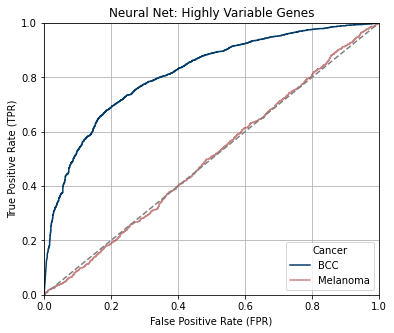

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('Neural Net: Highly Variable Genes')
plt.plot(fpr[0], tpr[0], color='#003C67FF')
plt.plot(fpr[2], tpr[2], color='#A7303099')
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(labels=['BCC', 'Melanoma'], title="Cancer", loc=4)
plt.grid()
plt.show()

fprMLPbcc, tprMLPbcc = fpr[0], tpr[0]
fprMLPmelanoma, tprMLPmelanoma = fpr[2], tpr[2]

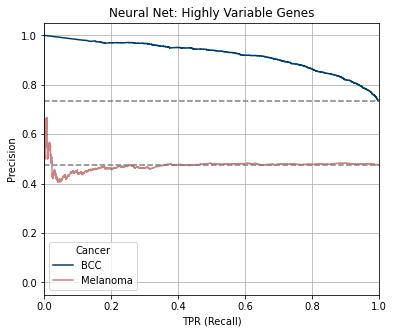

In [ ]:
# Plot PR curve

baseline1 = len(CD8ResponsesBCC[CD8ResponsesBCC==1]) / len(CD8ResponsesBCC)
baseline2 = len(CD8ResponsesMelanoma[CD8ResponsesMelanoma==1]) / len(CD8ResponsesMelanoma)

plt.figure(figsize=(6, 5))
plt.plot(rec[0], pre[0], color='#003C67FF')
plt.plot(rec[2], pre[2], color='#A7303099')
plt.xlim([0,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('Neural Net: Highly Variable Genes')
plt.legend(labels=['BCC', 'Melanoma'], title="Cancer")
plt.plot([0, 1], [baseline1, baseline1], linestyle='--', color='grey')
plt.plot([0, 1], [baseline2, baseline2], linestyle='--', color='grey')
plt.grid()
plt.show()

recMLPbcc, preMLPbcc = rec[0], pre[0]
recMLPmelanoma, preMLPmelanoma = rec[2], pre[2]

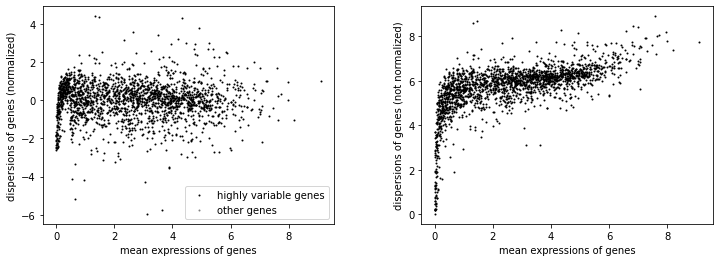

Saving BCCandPDACGenes.csv to BCCandPDACGenes.csv


In [ ]:
## Train new classifier on melanoma dataset (top 2000 highly variable genes)

# Determine top 2000 highly variable genes for pretreatment CD8 melanoma

sc.pp.highly_variable_genes(melanoma_cd8pre, n_top_genes=2000)
sc.pl.highly_variable_genes(melanoma_cd8pre)
melanoma_filtered = melanoma_cd8pre[:, melanoma_cd8pre.var.highly_variable]
melanoma_genes = tuple(melanoma_cd8pre.var.index[melanoma_cd8pre.var.highly_variable])

# Compare list of highly variable genes with available genes in BCC and PDAC 

uploaded = files.upload()
bccpdac_genes = pd.read_csv(io.BytesIO(uploaded['BCCandPDACGenes.csv']))
bccpdac_genes = tuple(bccpdac_genes.T.itertuples(index=False, name=None))

gene_comparison = {bccpdac_genes[0], melanoma_genes}
gene_comparison = (set(tup) for tup in gene_comparison)
common_genes = set.intersection(*gene_comparison)
discarded_genes = set(bccpdac_genes[0]).difference(set(melanoma_genes))

In [ ]:
# Export set of highly variable melanoma genes

df1 = pd.DataFrame(common_genes)
df2 = pd.DataFrame(melanoma_filtered.X.todense())

with open('MelanomaGenes.csv', 'w') as f:
  f.write(df1.to_csv())
with open('MelanomaData.csv', 'w') as f:
  f.write(df2.to_csv())

files.download('MelanomaGenes.csv')
files.download('MelanomaData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download gene expression data for BCC and PDAC
uploaded = files.upload()

# Create datasets from uploaded files 
BCCdata = pd.read_csv(io.BytesIO(uploaded['CD8MelanomaGenesDataBCC']))
PDACdata = pd.read_csv(io.BytesIO(uploaded['CD8MelanomaGenesDataPDAC']))
melanomadata = pd.read_csv(io.BytesIO(uploaded['MelanomaData.csv']))

melanomadata = melanomadata.drop(['Unnamed: 0'], axis=1)
CD8ResponsesMelanoma = melanoma_filtered.obs['Responsive']

CD8GenesMelanoma = np.array(melanomadata)
CD8DataMelanoma = (CD8GenesMelanoma, CD8ResponsesMelanoma)
dataset = [CD8DataMelanoma]

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(score, names[i])
        i += 1

## Performance for most classifiers changes appreciably between test runs
## Cross validation needed for neural net, AdaBoost, linear SVM, decision tree 

0.652267818574514 Nearest Neighbors
0.8488120950323974 Linear SVM
0.6112311015118791 RBF SVM
0.8250539956803455 Decision Tree
0.6177105831533477 Random Forest
0.8768898488120951 Neural Net
0.8790496760259179 AdaBoost
0.6976241900647948 Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.45788336933045354 QDA


In [ ]:
## Cross validation for initial models 

from sklearn.model_selection import cross_val_score

neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(50), verbose=False)
linearSVM = SVC(kernel="linear", C=0.025)
decisiontree = DecisionTreeClassifier(max_depth=5)
adaboost = AdaBoostClassifier()

shuffler = np.random.permutation(len(CD8ResponsesMelanoma))
X = CD8GenesMelanoma[shuffler]
y = CD8ResponsesMelanoma[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

neuralnet_scores = cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='f1')
linearSVM_scores = cross_val_score(linearSVM, X_train, y_train, cv=5, scoring='f1')
decisiontree_scores = cross_val_score(decisiontree, X_train, y_train, cv=5, scoring='f1')
adaboost_scores = cross_val_score(adaboost, X_train, y_train, cv=5, scoring='f1')

print("Neural net:", neuralnet_scores, "Mean:", neuralnet_scores.mean(), "SD:", neuralnet_scores.std())
print("Linear SVM:", linearSVM_scores, "Mean:", linearSVM_scores.mean(), "SD:", linearSVM_scores.std())
print("Decision Tree:", decisiontree_scores, "Mean:", decisiontree_scores.mean(), "SD:", decisiontree_scores.std())
print("AdaBoost:", adaboost_scores, "Mean:", adaboost_scores.mean(), "SD:", adaboost_scores.std())

## AdaBoost performs significantly better

Neural net: [0.41340782 0.75095785 0.82783883 0.82310469 0.80136986] Mean: 0.7233358119257003 SD: 0.15734189510178698
Linear SVM: [0.78767123 0.75985663 0.79569892 0.81428571 0.78200692] Mean: 0.7879038846266415 SD: 0.017766487249808796
Decision Tree: [0.82828283 0.78498294 0.82312925 0.81403509 0.76124567] Mean: 0.8023351555193751 SD: 0.025424435307873562
AdaBoost: [0.85304659 0.82105263 0.81588448 0.84353741 0.83154122] Mean: 0.8330124673398602 SD: 0.013789206693089057


In [ ]:
## Optimize AdaBoost
## Function of AdaBoost: classifier fitted on original dataset, addition estimators (n_estimators) focus on more difficult cases 

for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True) 

classifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



[[251  20]
 [ 34 158]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       271
           1       0.89      0.82      0.85       192

    accuracy                           0.88       463
   macro avg       0.88      0.87      0.88       463
weighted avg       0.88      0.88      0.88       463



In [ ]:
## Cross validation with 5 folds and 80/20 split

from sklearn.model_selection import cross_val_score

classifier = AdaBoostClassifier(n_estimators=100)

shuffler = np.random.permutation(len(CD8ResponsesMelanoma))
X = CD8GenesMelanoma[shuffler]
y = CD8ResponsesMelanoma[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1') 
print(scores)
print("Mean: {}, SD: {}".format(scores.mean(), scores.std()))

[0.78927203 0.84363636 0.8705036  0.86029412 0.85815603]
Mean: 0.8443724274851719, SD: 0.028854536623448893


In [ ]:
## Construct ROC and PR curves for neural net on melanoma dataset

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

classifier = AdaBoostClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
pre, rec, threshold = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9622982694925141


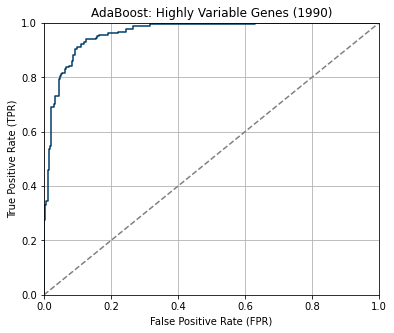

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('AdaBoost: Highly Variable Genes (1990)')
plt.plot(fpr, tpr, color='#003C67FF')
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.grid()
plt.show()

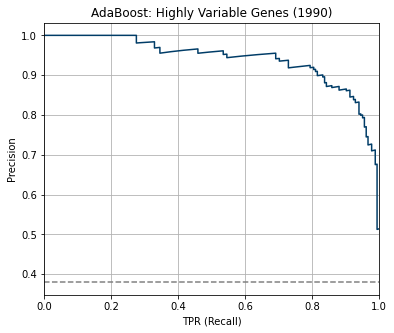

In [ ]:
# Plot PR curve

baseline = len(CD8ResponsesMelanoma[CD8ResponsesMelanoma==1]) / len(CD8ResponsesMelanoma)
plt.figure(figsize=(6, 5))
plt.plot(rec, pre, color='#003C67FF')
plt.xlim([0,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('AdaBoost: Highly Variable Genes (1990)')
plt.plot([0, 1], [baseline, baseline], linestyle='--', color='grey')
plt.grid()
plt.show()

In [ ]:
## Test classifier on BCC and PDAC datasets

CD8DataBCC = (BCCdata, CD8ResponsesBCC)
CD8DataPDAC = (PDACdata, CD8ResponsesPDAC)

dataset = [CD8DataBCC, CD8DataPDAC, CD8DataMelanoma]

# Test neural net on all three cancers

for ds_cnt, ds in enumerate(dataset):
    X, y = ds
    #X = StandardScaler().fit_transform(X)
    predictions = classifier.predict(X)
    print(confusion_matrix(y, predictions))
    print(classification_report(y, predictions))


[[ 978  593]
 [3779  532]]
              precision    recall  f1-score   support

           0       0.21      0.62      0.31      1571
           1       0.47      0.12      0.20      4311

    accuracy                           0.26      5882
   macro avg       0.34      0.37      0.25      5882
weighted avg       0.40      0.26      0.23      5882

[[2496 2183]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.70      4679
           1       0.00      0.00      0.00         0

    accuracy                           0.53      4679
   macro avg       0.50      0.27      0.35      4679
weighted avg       1.00      0.53      0.70      4679



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1412   23]
 [  36  841]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1435
           1       0.97      0.96      0.97       877

    accuracy                           0.97      2312
   macro avg       0.97      0.97      0.97      2312
weighted avg       0.97      0.97      0.97      2312



In [ ]:
## Visualize ROC and PR curves for AdaBoost

fpr1, tpr1, threshold = roc_curve(CD8ResponsesMelanoma, classifier.predict_proba(CD8GenesMelanoma)[:,1])
fpr2, tpr2, threshold = roc_curve(CD8ResponsesBCC, classifier.predict_proba(BCCdata)[:,1])

pre1, rec1, threshold = precision_recall_curve(CD8ResponsesMelanoma, classifier.predict_proba(CD8GenesMelanoma)[:,1])
pre2, rec2, threshold = precision_recall_curve(CD8ResponsesBCC, classifier.predict_proba(BCCdata)[:,1])

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
print("Melanoma:", roc_auc1, "BCC:", roc_auc2)

Melanoma: 0.9925983019400156 BCC: 0.30840561375345676


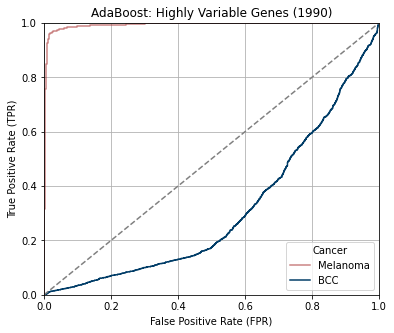

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('AdaBoost: Highly Variable Genes (Melanoma 1990)')
plt.plot(fpr1, tpr1, color='#A7303099')
plt.plot(fpr2, tpr2, color='#003C67FF')
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1.00])
plt.ylim([0, 1.00])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(labels=['Melanoma', 'BCC'], title='Cancer')
plt.grid()
plt.show()

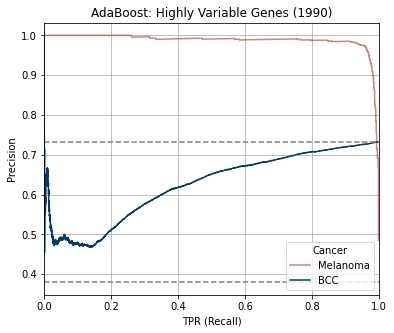

In [ ]:
# Plot PR curve
baseline1 = len(CD8ResponsesMelanoma[CD8ResponsesMelanoma==1]) / len(CD8ResponsesMelanoma)
baseline2 = len(CD8ResponsesBCC[CD8ResponsesBCC==1]) / len(CD8ResponsesBCC)

plt.figure(figsize=(6, 5))
plt.plot(rec1, pre1, color='#A7303099')
plt.plot(rec2, pre2, color='#003C67FF')
plt.xlim([0,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('AdaBoost: Highly Variable Genes (1990)')
plt.plot([0, 1], [baseline1, baseline1], linestyle='--', color='grey')
plt.plot([0, 1], [baseline2, baseline2], linestyle='--', color='grey')
plt.legend(labels=['Melanoma', 'BCC'], title='Cancer')
plt.grid()
plt.show()

# Prediction of melanoma CD8+ T cell response based on the top *n* highly variable genes 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Construct regression classifiers using top 2000 higly variable genes in BCC

from google.colab import files
import pandas as pd
import io

## Upload csv files from R
uploaded = files.upload()

# Download CD8MelanomaVarGenesDataBCC, CD8MelanomaVarGenesDataPDAC, CD8MelanomaVarGenesResponsesBCC, CD8MelanomaVarGenesResponsesPDAC, CD8VarGenesDataMelanoma, CD8VarGenesNamesMelanoma 
# Execution time: 53s

Saving CD8MelanomaVarGenesDataBCC.csv to CD8MelanomaVarGenesDataBCC.csv
Saving CD8MelanomaVarGenesDataPDAC.csv to CD8MelanomaVarGenesDataPDAC.csv
Saving CD8VarGenesDataMelanoma.csv to CD8VarGenesDataMelanoma.csv


In [ ]:
CD8GenesMelanoma = pd.read_csv(io.BytesIO(uploaded['CD8VarGenesDataMelanoma.csv']))
CD8ResponsesMelanoma = np.array([1]*293+[0]*378+[1]*280+[0]*234+[1]*16+[0]*403+[1]*72+[0]*255+[1]*326+[0]*171+[1]*323) # 2751 total cells, 1512 responders, 1239 nonresponders

CD8GenesBCC = pd.read_csv(io.BytesIO(uploaded['CD8MelanomaVarGenesDataBCC.csv']))
CD8ResponsesBCC = np.array([1]*468+[0]*1509+[1]*3330+[0]*62+[1]*513) # 5982 total cells, 4311 responders, 1571 nonresponders
CD8GenesPDAC = pd.read_csv(io.BytesIO(uploaded['CD8MelanomaVarGenesDataPDAC.csv']))
CD8ResponsesPDAC = np.array([0]*3300+[1]*1379) # 4679 total cells, 3300 PDAC, 1379 healthy/adjacent

## Turn dataframes into numpy arrays

CD8GenesMelanoma = np.array(CD8GenesMelanoma)
CD8DataMelanoma = (CD8GenesMelanoma, CD8ResponsesMelanoma)
CD8DataBCC = (CD8GenesBCC, CD8ResponsesBCC)
CD8DataPDAC = (CD8GenesPDAC, CD8ResponsesPDAC)
dataset = [CD8DataMelanoma]

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.25),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(score, names[i])
        i += 1

## Best performer: AdaBoost (0.681)

0.5245009074410163 Nearest Neighbors
0.5353901996370236 Linear SVM
0.5335753176043557 RBF SVM
0.604355716878403 Decision Tree
0.515426497277677 Random Forest
0.5825771324863884 Neural Net
0.6188747731397459 AdaBoost
0.5535390199637024 Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.5027223230490018 QDA


In [ ]:
## Cross validation for initial models 

from sklearn.model_selection import cross_val_score

neuralnet = MLPClassifier(alpha=1, max_iter=1000, verbose=False)
decisiontree = DecisionTreeClassifier(max_depth=5)
adaboost = AdaBoostClassifier()

shuffler = np.random.permutation(len(CD8ResponsesMelanoma))
X = CD8GenesMelanoma[shuffler]
y = CD8ResponsesMelanoma[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

neuralnet_scores = cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='f1')
print("Neural net:", neuralnet_scores, "Mean:", neuralnet_scores.mean(), "SD:", neuralnet_scores.std())

decisiontree_scores = cross_val_score(decisiontree, X_train, y_train, cv=5, scoring='f1')
print("Decision Tree:", decisiontree_scores, "Mean:", decisiontree_scores.mean(), "SD:", decisiontree_scores.std())

adaboost_scores = cross_val_score(adaboost, X_train, y_train, cv=5, scoring='f1')
print("AdaBoost:", adaboost_scores, "Mean:", adaboost_scores.mean(), "SD:", adaboost_scores.std())

## AdaBoost performs best and most consistently 

Neural net: [0.54504505 0.5785877  0.56818182 0.50746269 0.54767726] Mean: 0.5493909021448696 SD: 0.024435014998682635
Decision Tree: [0.5721393  0.6031746  0.57216495 0.50574713 0.60566449] Mean: 0.5717780939130018 SD: 0.036039970293685865
AdaBoost: [0.61916462 0.61083744 0.57894737 0.65258216 0.57142857] Mean: 0.6065920314124604 SD: 0.029298060162322268


In [ ]:
## Optimize AdaBoost
## Function of AdaBoost: classifier fitted on original dataset, addition estimators (n_estimators) focus on more difficult cases 

for ds_cnt, ds in enumerate(dataset):
    # Split dataset into training and testing parts
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True) 

classifier = AdaBoostClassifier(n_estimators=500)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Best: 500 estimators (0.68)

[[193 107]
 [ 93 158]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       300
           1       0.60      0.63      0.61       251

    accuracy                           0.64       551
   macro avg       0.64      0.64      0.64       551
weighted avg       0.64      0.64      0.64       551



In [ ]:
## Cross validation with 5 folds and 80/20 split

from sklearn.model_selection import cross_val_score

classifier = AdaBoostClassifier(n_estimators=500)

shuffler = np.random.permutation(len(CD8ResponsesMelanoma))
X = CD8GenesMelanoma[shuffler]
y = CD8ResponsesMelanoma[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1') 
print(scores)
print("Mean: {}, SD: {}".format(scores.mean(), scores.std()))

[0.56585366 0.58490566 0.64516129 0.5382716  0.6047619 ]
Mean: 0.5877908237873402, SD: 0.036113998511600826


In [ ]:
## Construct ROC and PR curves for melanoma dataset

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

shuffler = np.random.permutation(len(CD8ResponsesMelanoma))
X = CD8GenesMelanoma[shuffler]
y = CD8ResponsesMelanoma[shuffler]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

classifier = AdaBoostClassifier(n_estimators=500)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
pre, rec, threshold = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6437827259745068


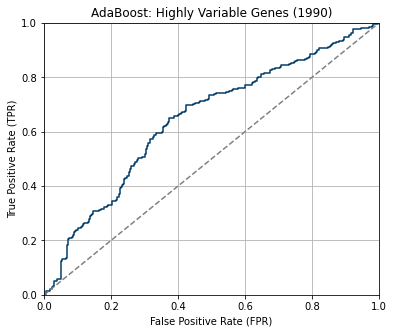

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('AdaBoost: Highly Variable Genes (1990)')
plt.plot(fpr, tpr, color='#003C67FF')
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.grid()
plt.show()

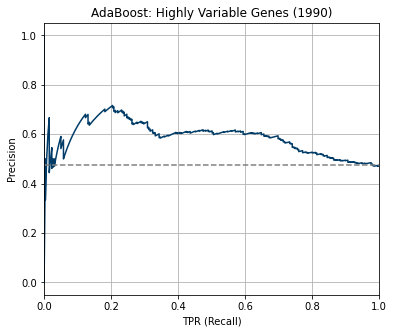

In [ ]:
# Plot PR curve
baseline = len(CD8ResponsesMelanoma[CD8ResponsesMelanoma==1]) / len(CD8ResponsesMelanoma)
plt.figure(figsize=(6, 5))
plt.plot(rec, pre, color='#003C67FF')
plt.xlim([0,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('AdaBoost: Highly Variable Genes (1990)')
plt.plot([0, 1], [baseline, baseline], linestyle='--', color='grey')
plt.grid()
plt.show()

In [ ]:
## Test AdaBoost on all three datasets

dataset = [CD8DataBCC, CD8DataPDAC, CD8DataMelanoma]

for ds_cnt, ds in enumerate(dataset):
    X, y = ds
    #X = StandardScaler().fit_transform(X)
    predictions = classifier.predict(X)
    print(confusion_matrix(y, predictions))
    print(classification_report(y, predictions))


[[ 843  728]
 [2385 1926]]
              precision    recall  f1-score   support

           0       0.26      0.54      0.35      1571
           1       0.73      0.45      0.55      4311

    accuracy                           0.47      5882
   macro avg       0.49      0.49      0.45      5882
weighted avg       0.60      0.47      0.50      5882

[[2250 1050]
 [1132  247]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3300
           1       0.19      0.18      0.18      1379

    accuracy                           0.53      4679
   macro avg       0.43      0.43      0.43      4679
weighted avg       0.53      0.53      0.53      4679

[[1336  105]
 [ 104 1206]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1441
           1       0.92      0.92      0.92      1310

    accuracy                           0.92      2751
   macro avg       0.92      0.92      0.92    

In [ ]:
## Visualize ROC and PR curves for AdaBoost

fpr1, tpr1, threshold = roc_curve(CD8ResponsesMelanoma, classifier.predict_proba(CD8GenesMelanoma)[:,1])
fpr2, tpr2, threshold = roc_curve(CD8ResponsesBCC, classifier.predict_proba(CD8GenesBCC)[:,1])

pre1, rec1, threshold = precision_recall_curve(CD8ResponsesMelanoma, classifier.predict_proba(CD8GenesMelanoma)[:,1])
pre2, rec2, threshold = precision_recall_curve(CD8ResponsesBCC, classifier.predict_proba(CD8GenesBCC)[:,1])

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
print("Melanoma:", roc_auc1, "BCC:", roc_auc2)

Melanoma: 0.9409713356394785 BCC: 0.4860779812009631


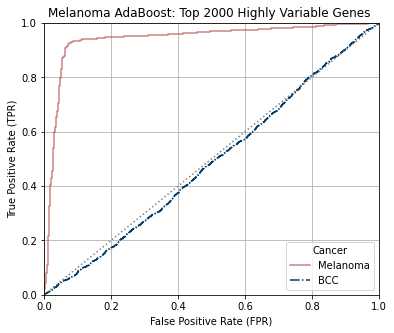

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('Melanoma AdaBoost: Top 2000 Highly Variable Genes ')
plt.plot(fpr1, tpr1, color='#A7303099')
plt.plot(fpr2, tpr2, '-.', color='#003C67FF')
plt.plot([0, 1], [0, 1], ':', color='gray')
plt.xlim([0, 1.00])
plt.ylim([0, 1.00])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(labels=['Melanoma', 'BCC'], title='Cancer')
plt.grid()
plt.show()

fprADAmelanoma, tprADAmelanoma = fpr1, tpr1
fprADAbcc, tprADAbcc = fpr2, tpr2

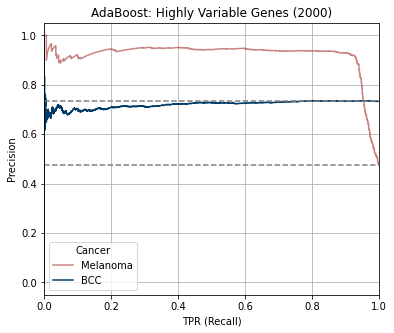

In [ ]:
# Plot PR curve
baseline1 = len(CD8ResponsesMelanoma[CD8ResponsesMelanoma==1]) / len(CD8ResponsesMelanoma)
baseline2 = len(CD8ResponsesBCC[CD8ResponsesBCC==1]) / len(CD8ResponsesBCC)

plt.figure(figsize=(6, 5))
plt.plot(rec1, pre1, color='#A7303099')
plt.plot(rec2, pre2, color='#003C67FF')
plt.xlim([0,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('AdaBoost: Highly Variable Genes (2000)')
plt.plot([0, 1], [baseline1, baseline1], linestyle='--', color='grey')
plt.plot([0, 1], [baseline2, baseline2], linestyle='--', color='grey')
plt.legend(labels=['Melanoma', 'BCC'], title='Cancer')
plt.grid()
plt.show()

recADAmelanoma, preADAmelanoma = rec1, pre1
recADAbcc, preADAbcc = rec2, pre2

In [ ]:
## Compare neural nets for top n genes

dataset = [CD8DataMelanoma]
topgenes = [2000, 1000, 500, 200, 100, 50, 20, 10, 5]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

i = 0
for ds_cnt, ds in enumerate(dataset):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True)

classifier = AdaBoostClassifier(n_estimators=500)

# Iterate over gene subsets 
for i in range(len(topgenes)):
  classifier.fit(X_train[:, 0:topgenes[i]], y_train)
  score = classifier.score(X_test[:, 0:topgenes[i]], y_test)
  print(score, "Number of genes: ", topgenes[i])


NameError: ignored

In [ ]:
## Construct ROC and PR curves for neural net

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

classifier = AdaBoostClassifier(n_estimators=500)
fpr, tpr, roc_auc, pre, rec = ([0] * len(topgenes) for i in range(5))

for i in range(len(topgenes)):
  classifier.fit(X_train[:, 0:topgenes[i]], y_train)
  predictions = classifier.predict(X[:, 0:topgenes[i]])
  fpr[i], tpr[i], threshold = roc_curve(y, classifier.predict_proba(X[:, 0:topgenes[i]])[:,1])
  pre[i], rec[i], threshold = precision_recall_curve(y, classifier.predict_proba(X[:, 0:topgenes[i]])[:,1])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print("AUC:", roc_auc[i], "Genes:", topgenes[i])

AUC: 0.9407356002775851 Genes: 2000
AUC: 0.9261597385191582 Genes: 1000
AUC: 0.9007302498794836 Genes: 500
AUC: 0.8605654470231128 Genes: 200
AUC: 0.7907416923150272 Genes: 100
AUC: 0.7142707301439309 Genes: 50
AUC: 0.5922456309496691 Genes: 20
AUC: 0.5476365543436228 Genes: 10
AUC: 0.5204610347987774 Genes: 5


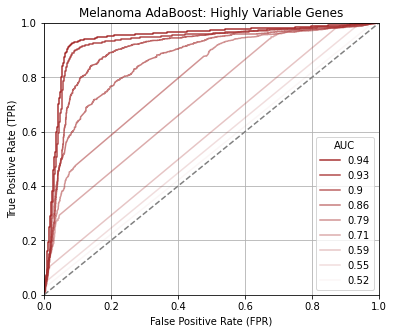

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('Melanoma AdaBoost: Highly Variable Genes')
for i in range(len(topgenes)): 
  plt.plot(fpr[i], tpr[i], color='#A7303099', alpha=1-0.12*i)
plt.plot([0, 1], [0, 1], 'r--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(labels=np.round(roc_auc, decimals=2), title="AUC", loc=4)
plt.grid()
plt.show()

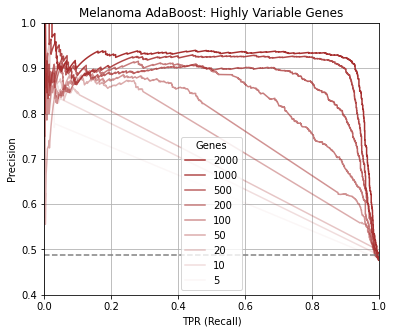

In [ ]:
baseline = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(6, 5))
for i in range(len(topgenes)):
  plt.plot(rec[i], pre[i], color='#A7303099', alpha=1-0.12*i)
plt.xlim([0,1])
plt.ylim([0.4,1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('Melanoma AdaBoost: Highly Variable Genes')
plt.legend(labels=topgenes, title="Genes")
plt.plot([0, 1], [baseline, baseline], linestyle='--', color='grey')
plt.grid()
plt.show()

In [ ]:
## Export predictions to a csv for per-patient analysis in R

from google.colab import files

df1 = pd.DataFrame(classifier.predict(CD8GenesBCC))
df2 = pd.DataFrame(classifier.predict(CD8GenesPDAC))
df3 = pd.DataFrame(classifier.predict(CD8GenesMelanoma))

with open('BCCpredictionsMelanomaVar.csv', 'w') as f:
  f.write(df1.to_csv())

with open('PDACpredictionsMelanomaVar.csv', 'w') as f: 
  f.write(df2.to_csv())

with open('MelanomaPredictionsVar.csv', 'w') as f: 
  f.write(df3.to_csv())

files.download('BCCpredictionsMelanomaVar.csv')
files.download('PDACpredictionsMelanomaVar.csv')
files.download('MelanomaPredictionsVar.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Figure 4C

Caption: *ROC and PR curve of MLP and AdaBoost classifier trained on the top 2000 highly variable genes in BCC and melanoma CD8+ T cells respectively; both models were subsequently tested on each dataset separately.*

** All preceding cells should be run chronologically to ensure that all variables are stored correctly. 


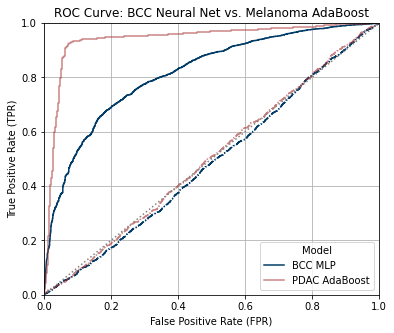

In [ ]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('ROC Curve: BCC Neural Net vs. Melanoma AdaBoost')
plt.plot(fprMLPbcc, tprMLPbcc, color='#003C67FF')
plt.plot(fprADAmelanoma, tprADAmelanoma, color='#A7303099')
plt.plot(fprADAbcc, tprADAbcc, '-.', color='#003C67FF')
plt.plot(fprMLPmelanoma, tprMLPmelanoma, '-.', color='#A7303099')
plt.plot([0, 1], [0, 1], ':', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(labels=['BCC MLP', 'PDAC AdaBoost'], title="Model", loc=4)
plt.grid()
plt.show()

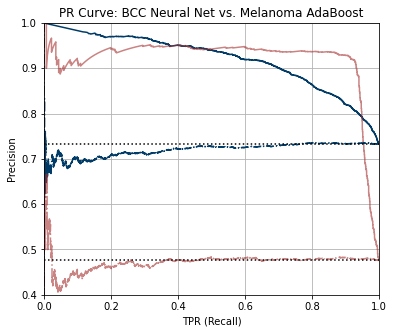

In [ ]:
# Plot PR curve

baseline1 = len(CD8ResponsesBCC[CD8ResponsesBCC==1]) / len(CD8ResponsesBCC)
baseline2 = len(CD8ResponsesMelanoma[CD8ResponsesMelanoma==1]) / len(CD8ResponsesMelanoma)

plt.figure(figsize=(6, 5))
plt.plot(recMLPbcc, preMLPbcc, color='#003C67FF')
plt.plot(recADAmelanoma, preADAmelanoma, color='#A7303099')
plt.plot(recADAbcc, preADAbcc, '-.', color='#003C67FF')
plt.plot(recMLPmelanoma, preMLPmelanoma, '-.', color='#A7303099')
plt.xlim([0,1])
plt.ylim([0.4, 1])
plt.xlabel('TPR (Recall)')
plt.ylabel('Precision')
plt.title('PR Curve: BCC Neural Net vs. Melanoma AdaBoost')
plt.plot([0, 1], [baseline1, baseline1], linestyle=':', color='black')
plt.plot([0, 1], [baseline2, baseline2], linestyle=':', color='black')
plt.grid()
plt.show()

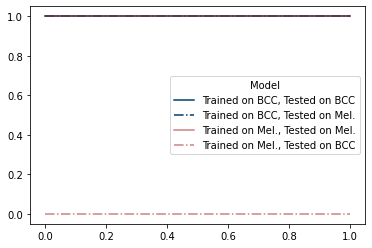

In [ ]:
# Extra legend

plt.plot([0, 1], [1, 1], color='#003C67FF')
plt.plot([0, 1], [1, 1], linestyle='-.', color='#003C67FF')
plt.plot([0, 1], [1, 1], color='#A7303099')
plt.plot([0, 1], [0, 0], linestyle='-.', color='#A7303099')
plt.legend(labels=['Trained on BCC, Tested on BCC', 'Trained on BCC, Tested on Mel.', 'Trained on Mel., Tested on Mel.', 'Trained on Mel., Tested on BCC'], title='Model')